# Benchmarking sorting algorithms
The final project assignment for Computational Thinking with Algorithms module, GMIT 2020.

Lecturer: dr Dominic Carr

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie


<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Comparison_computational_complexity.svg" alt="Big O notation" style="width:400px">
  <figcaption>Image source: Wikipedia.</figcaption>
</figure>

___

## Sorting Algorithms

In [ ]:
######################################
#   Bubble Sort                      
######################################

##### Credits #####
# Source: https://stackabuse.com/sorting-algorithms-in-python/
# Adapted and commented by the author of this Notebook

##### Function definition #####
# Function performing the bubble sort; it takes an arrey to be sorted as an argument
def bubble_sort(array):
    
    # Variable swapped is initially set to True, so that the loop runs at least once
    swapped = True
    
    while swapped:
        
        swapped = False
        
        # loop through each element of the array
        for i in range(len(array) - 1):
            
            # compare current (i-th) element with the next one
            
            if array[i] > array[i + 1]:
                
                # when the above condition is satisfied, swap the elements
                array[i], array[i + 1] = array[i + 1], array[i]
                
                # Set the swapped to True so it will loop again
                swapped = True



######################################
#   Quicksort                      
######################################

##### Credits #####
# Source: https://youtu.be/u4tVQszsyEQ
# Adapted and commented by the author of this Notebook


##### Function definition #####
# Function performing the quick sort; it takes an array to be sorted as an argument
def sortowanie_szybkie(array):
    
    # creation of empty lists
    mniejsze = [] # less than the pivot
    rowne = [] # equal to the pivot
    wieksze =[] # greater than the pivot
    
    # base case of the recursion 
    # check whether the array is more than one element long (otherwise, one-element list is considered to be sorted)
    if len(array) <= 1:
        return array
    
    # recursion case, when the array contains more than one element
    else: 
        # set the pivot value at the middle element of the list
        middle = (len(array))//2
        pivot = array[middle]
        
        # let's consider three cases for each element of the list
        for x in array:
            
            # case #1 - the current element is greater than the pivot
            if x > pivot:
                wieksze.append(x) # add the current element to the list "wieksze"
                
            # case #2 - the current element is equal to the pivot
            elif x == pivot:
                rowne.append(x) # add the current element to the list "rowne"
                
            # case #3 - the current element is less than the pivot
            else:
                mniejsze.append(x) # add the current element to the list "mniejsze"
        
        # as a result of the above loop, the function will return:
        # in the middle: the element(s) that has just been sorted, i.e. equal to the pivot (as well as those sorted on previous recurses)
        # on the left-hand side: elements that are less than the pivot - still unsorted, therefore the same function is called recursively (with the "mniejsze" list as an argument)
        # on the the right-hand side: elements that are greater than the pivot - still unsorted, therefore the same function is called recursively (with the "wieksze" list as an argument)
        
        return sortowanie_szybkie(mniejsze) + rowne + sortowanie_szybkie(wieksze)
        


######################################
#   Bucket Sort                      
######################################

##### Credits #####
# Own implementation, developed based on pseudocode from https://youtu.be/geVyIsFpxUs
# Adapted and commented by the author of this Notebook

# Auxiliary function that sorts the content of each bucket, using the insert sort
# Adapted from: https://www.geeksforgeeks.org/bucket-sort-2/

# the function takes one argument, a list
def insertSort(list): 
    
    # loop through all elements of the list
    for i in range(1, len(list)): 
        #temorary variable 
        j = i-1 # j is equal to the previous iteration number
        
        # inner loop - executed as long as two conditions are satisfied
        while list[j] > list[i] and j >= 0:  # compare the current and the previous element and the index of the previous element is not-negative
            list[j+1] = list[j] # swap  
            j -= 1 # decrementation
            
        list[j+1] = list[i] # move to the next element
        
    return list   
        

##### Function definition #####

# import required external libraries
import math # will be needed for ceil() method

# define the function, which takes as an argument the array to be sorted
def bucket_sort(array):

    #print("Original list:", arr) # for testing
    
    # number of buckets
    n_buckets = 6 # assumed arbitrarily

    # create an empty array of buckets, where each bucket is also an empty array
    bucket = []
    for i in range(n_buckets):
        bucket.append([])
        
    # define a divider which will be used for sorting;
    # divider is the value of the maximum element of the array to be sorted divided by number of buckets
    divider = math.ceil((max(array)+1)/n_buckets)
    # divider = 10 # alternatively to the above line, it can be just assumed arbitrarily

    
    # sorting the array's element into the buckets (unsorted)
    # loop through the array
    for i in array:
        
        # determine into which bucket index will fall each element of the arrey
        j = i//divider
        # put the current i-element of the array to the corresponding bucket
        bucket[j].append(i)
    
    # for testing 
    #print("Sorted unto the buckets:", bucket) # for testing
        
    # put sorted content of each bucket into a single array (concatenate single buckets)
    # adopted from https://gist.github.com/sahid/5022081
    sorted_result = []
    for i in range(n_buckets):
        
        # adding the sorted content of each bucket to the resulting array, 
        # using the insertSort() function iteratively for each bucket
        sorted_result += insertSort(bucket[i])
        
    return sorted_result 



######################################
#   Merge Sort                      
######################################

##### Credits #####
# Source: https://stackabuse.com/sorting-algorithms-in-python/
# Adapted and commented by the author of this Notebook


# Auxiliary function, merging and sorting two arrays
def merge(left_list, right_list):
    sorted_list = []
    left_list_index = right_list_index = 0

    # We use the list lengths often, so its handy to make variables
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        
        if left_list_index < left_list_length and right_list_index < right_list_length:
            
            # We check which value from the start of each list is smaller
            # If the item at the beginning of the left list is smaller, add it to the sorted list
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
                
            # If the item at the beginning of the right list is smaller, add it to the sorted list
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # If we've reached the end of the of the left list, add the element from the right list
        elif left_list_index == left_list_length:
            
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
            
        # If we've reached the end of the of the right list, add the elements from the left list
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    # final result of the sorting
    return sorted_list


##### Function definition #####
# Function performing the merge sort; it takes an array to be sorted as an argument
def merge_sort(array):
    
    # If the list is a single element, return it
    if len(array) <= 1:
        return array

    # Use floor division to get midpoint, indices must be integers
    mid = len(array) // 2

    # Sort and merge each half
    left_list = merge_sort(array[:mid])
    right_list = merge_sort(array[mid:])

    # Merge the sorted lists into a new one
    return merge(left_list, right_list)



######################################
#   Timsort                      
######################################

##### Credits #####
# Source: https://quinston.com/code-snippets/
# Adapted and commented by the author of this Notebook


# Auxiliary function that sorts the content of each run, using the insert sort algorithm
# Function InsertionSort() takes one argument - an array
def InsertionSort(array):

    # loop through all elements of the array
    for x in range (1, len(array)):
       
        # inner loop
        for i in range(x, 0, -1): # decrementation
           
            # compare current and the next (because decrementation) element
            if array[i] < array[i - 1]:
                # swap the values if condition satisfied
                array[i], array[i - 1] = array[i - 1], array[i]
                
            else:
                break
                
            # decrementation
            i = i - 1
            
    return array


# Merge Sort implementation
# The Merge() function takes two arguments - two arrays - and merge them together. The function returns yet another array
def Merge(aArr, bArr):
    
    a = 0 # a is a pointer (index position) of aArr array
    b = 0 # b is a pointer of bArr array
    
    # placeholder - an empty array cArr which will be holding sorted values of aArr and bArr arrays
    cArr = []

    # end of loop codition:
    while a < len(aArr) and b < len(bArr):
        # check if a-element of array aArr is less than b-element of array bArr
        if aArr[a] < bArr[b]:
            cArr.append(aArr[a]) # if the condition is satisfied, assign the value of a-element to cArr array
            a = a + 1 # move the pointer to the next aArr array index
            
        elif aArr[a] > bArr[b]:
            cArr.append(bArr[b])
            b = b + 1
        
        # in case the a-element of aArra and b-element of bArr are equal
        else:
            cArr.append(aArr[a])
            cArr.append(bArr[b])
            a = a + 1
            b = b + 1
    
    # when there are no left elements from bArr to compare with aArr, the remaining elements from aArr are appended at the end of cArr array
    while a < len(aArr):
        cArr.append(aArr[a])
        a = a + 1

    while b < len(bArr):
        cArr.append(bArr[b])
        b = b + 1

    # function returns merged the two arrays, sorted
    return cArr


##### Function definition #####
# Implementation of the TimSort sorting algorithm, with an array to be sorted as an argument.
# Funtion TimSort divides the array to be sorted (arr) into smaller chunks of size RUN.
# The variable RUN is defined outside the funtion body, prior to its first call.
def TimSort(array):

    # chunk size - the array will be splitted into this size of chunks, usually the chunk size is between 32 and 64
    RUN = 32   
    
    # divide the array into chunks
    for x in range(0, len(array), RUN): # loop starting from index 0, to the last element of the array, with incrementing step size RUN; note the value of len(arr) is excluded from the loop
        # arr[x: x+RUN] is the current slice of the array (from x to x+RUN)
        # values of the current array slice are transfered (passed) to InsertionSort function; the return from the InsertionSort is already sorted array assigned to the original slice
        array[x: x+RUN] = InsertionSort(array[x: x+RUN])
    
    
    # merging the already sortd slices of the array
    # create an auxiliary variable     
    RUNinc = RUN
    # define loop termination condition
    while RUNinc < len(array):
        
        # the array is divided into pairs of neighbouring slices and passed to Merge() function
        for x in range(0, len(array), 2 * RUNinc):
            # the return from the Merge() function is assigned to the slice (size of 2xRUN) original array
            array[x: x+2 * RUNinc] = Merge(array[x: x+RUNinc], array[x+RUNinc: x+2*RUNinc])
        
        # incrementation for the while loop
        RUNinc = RUNinc*2

    return array


____
## Benchmark

In [2]:
#  external Python libraries for building and analysing the dataset.
import numpy as np # numerical calculations
import pandas as pd # data manipulation


# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Size", "Bubble", "Quick", "Bucket", "Merge", "Tim", "Python"]) 

# adding values of the size column to the dataset, assumed arbitrarily, based on the project brief.
data["Size"] = (100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000)

# generating arrays of random numbers, based on algorithm provided in the project brief
def random_array(size): 
    
    # create an empty array
    array = []
    
    # populate the arr list with randomly generated numbers
    for i in range(size):
        array.append(np.random.randint(0, 100)) # random integer numbers in range from 0 to 99
        
    return array


# populating the arrays for each test sizes
# create an empty container to hold the set of arrays
random_number_arrays = []

# loop through array sizes and for each one assign rundom numbers for each array size (array size is shown in "data" DataFrame, column "size")
for array_size in data["Size"]:
    
    # create an auxiliary counter representing the index 
    random_number_arrays_index = 0
    
    # call function random_array(), passing as an argument the number of elements to be generated
    random_number_arrays.append(random_array(array_size))
    
    # increment the counter by 1
    random_number_arrays_index += 1

### Benchmarking the algorithms

Getting times and collation the results into the dataframe. Each test is run `num_runs` times and the average time is then put into the dataset.


In [3]:
# the benchmarking algoirithms is based on the lecture materials, with modifications and additional comments

import time


#######################################
#   Bubble Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 

        # log the start time (time stamp)
        start_time = time.time()
        
        
        ##### call the sorting implementation to be benchmarked #####
        bubble_sort(ar)
        
           
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
        
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    #add the average time to the dataframe
    data.loc[current_array, "Bubble"] = average_result
    

    
#######################################
#   Quicksort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # log the start time (time stamp)
        start_time = time.time()
    
        
        ##### call the sorting implementation to be benchmarked #####
        sortowanie_szybkie(ar)
        
        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
         
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    #add the average time to the dataframe
    data.loc[current_array, "Quick"] = average_result

    
    
#######################################
#   Bucket Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): # Note: the last three arrays  tested for this sorting algorithm
        
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
    
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ##### call the sorting implementation to be benchmarked #####
        bucket_sort(ar)
        
        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed) 
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    #add the average time to the dataframe
    data.loc[current_array, "Bucket"] = average_result
    

    
#######################################
#   Merge Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # log the start time (time stamp)
        start_time = time.time()
    
            
        ##### call the sorting implementation to be benchmarked #####
        merge_sort(ar)
              
   
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
        
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
     
    #add the average time to the dataframe
    data.loc[current_array, "Merge"] = average_result
    
    
    
#######################################
#   Tim Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
          
        # log the start time (time stamp)
        start_time = time.time()
    
            
        ##### call the sorting implementation to be benchmarked #####
        TimSort(ar)
        
        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
        
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    #add the average time to the dataframe
    data.loc[current_array, "Tim"] = average_result
    
    

#######################################
#   Python built-in sorted() Benachmark                      
#######################################


# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
           
        # log the start time (time stamp)
        start_time = time.time()
    
         
        ##### call the sorting implementation to be benchmarked #####
        sorted(ar)
            
   
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
        
    #add the average time to the dataframe
    data.loc[current_array, "Python"] = average_result

## Results

In [4]:
# Apply formating to three decimal places
# Source: https://stackoverflow.com/a/42735712
pd.options.display.float_format = '{:,.3f}'.format

# transpose the table, source: https://stackoverflow.com/a/31328974
d = data.transpose().reset_index().rename(columns={'index':'Size'})
new_header = d.iloc[0] #grab the first row for the header
d = d[1:] #take the data less the header row
d.columns = new_header #set the header row as the df header

# show the results in a table format
d

,Size,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
1,Bubble,0.886,4.959,22.946,52.052,98.378,157.039,636.847,"1,492.935","2,657.598","4,312.202","6,924.178","9,717.238","12,413.655"
2,Quick,0.094,0.204,0.461,0.636,0.780,0.871,1.936,2.891,3.668,4.542,5.279,6.056,7.122
3,Bucket,0.045,0.104,0.208,0.305,0.411,0.509,1.096,1.672,2.280,2.841,3.464,3.985,4.590
4,Merge,0.229,0.628,1.374,2.212,3.024,3.830,8.455,12.857,19.500,22.471,27.165,36.985,42.022
5,Tim,0.268,0.755,1.689,2.782,3.812,5.031,10.723,15.988,22.765,28.811,34.632,42.699,56.854
6,Python,0.004,0.012,0.032,0.060,0.086,0.109,0.238,0.365,0.479,0.594,0.735,0.864,0.996


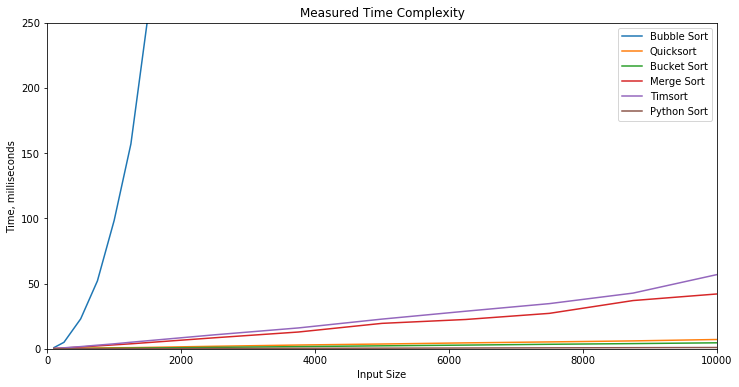

In [5]:
### Results visualisation

import matplotlib.pyplot as plt 
#import seaborn as sns
#import scipy.stats as stats

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

# Setting up the plotting output
plt.plot(data['Size'], data['Bubble'], label='Bubble Sort')
plt.plot(data['Size'], data['Quick'],  label='Quicksort')
plt.plot(data['Size'], data['Bucket'], label='Bucket Sort')
plt.plot(data['Size'], data['Merge'],  label='Merge Sort')
plt.plot(data['Size'], data['Tim'],    label='Timsort')
plt.plot(data['Size'], data['Python'], label='Python Sort')

# Adding title, labels and legend
plt.title("Measured Time Complexity")
plt.xlabel("Input Size") 
plt.ylabel("Time, milliseconds")
plt.legend()

# set axis ranges
plt.xlim(0,10000)
plt.ylim(0,250)

# set size of the plot in inches (dpi=100)
plt.gcf().set_size_inches(12, 6)

# plot the graph
plt.show()

___

Andrzej Kocielski, 2020